In [1]:
import torch
import torch.backends.cudnn as cudnn
import torch.nn as nn
import torch.optim
import segmentation_models_pytorch as smp
from collections import OrderedDict
import numpy as np
import copy

import os
from collections import OrderedDict
import json
import time

import torch
from torchvision import datasets, transforms
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

import torchvision.models as models
import matplotlib.pyplot as plt
from torchvision.utils import save_image
from PIL import Image
from torchinfo import summary

## Cifar 10

In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
all_train_data = {}
for i in range(1, 6):
    batch = unpickle('./cifar/data_batch_'+str(i))
    labels = batch[b'labels']
    data = batch[b'data']
    for j, label in enumerate(labels):
        if label not in all_train_data:
            all_train_data.update({label:[torch.tensor(data[j]).reshape((3, 32, 32))]})
        else:
            curr = all_train_data[label] 
            curr.append(torch.tensor(data[j]).reshape((3, 32, 32)))
            all_train_data.update({label:curr})
            
all_test_data = {}

batch = unpickle('./cifar/test_batch')
labels = batch[b'labels']
data = batch[b'data']
for j, label in enumerate(labels):
    if label not in all_test_data:
        all_test_data.update({label:[torch.tensor(data[j]).reshape((3, 32, 32))]})
    else:
        curr = all_test_data[label] 
        curr.append(torch.tensor(data[j]).reshape((3, 32, 32)))
        all_test_data.update({label:curr})

In [4]:
batch.keys()

dict_keys([b'batch_label', b'labels', b'data', b'filenames'])

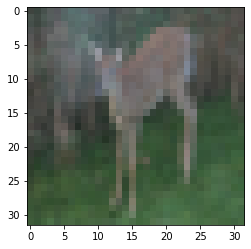

In [ ]:
plt.imshow(  all_test_data[4][6].permute([1, 2, 0]))

# Big tasks

In [7]:
vehicles = [0, 1, 8, 9]
animals = [3, 4, 5, 7]

tasks = [vehicles, animals]
task_names = ['vehicles', 'animals']

for task in all_train_data:
    if not os.path.exists('./cifar/train/' + str(task)):
        os.mkdir('./cifar/train/' + str(task)) 
    for image_idx in range(len(all_train_data[task])):
        image = all_train_data[task][image_idx]
        save_image(all_train_data[task][image_idx]/255., './cifar/train/'+ str(task) + '/' + str(image_idx) + '.png')
        
for task in all_test_data:
    if not os.path.exists('./cifar/test/' + str(task)):
        os.mkdir('./cifar/test/' + str(task)) 
    for image_idx in range(len(all_test_data[task])):
        image = all_test_data[task][image_idx]
        save_image(all_test_data[task][image_idx]/255., './cifar/test/'+ str(task) + '/' + str(image_idx) + '.png')
        
for i, task in enumerate(task_names):
    
    if not os.path.exists('./cifar/ext/' + str(task)):
        os.mkdir('./cifar/ext/' + str(task)) 
    print(task)

    for k in tasks[i]:  

        counter = 0
        lim = 5000
        if not os.path.exists('./cifar/ext/' + str(task)+ '/' + str(k)):
            os.mkdir('./cifar/ext/' + str(task)+ '/' + str(k)) 
        for image_idx in range(len(all_train_data[k])):
            image = all_train_data[k][image_idx]
            save_image(all_train_data[k][image_idx]/255., './cifar/ext/' + str(task) + '/' + str(k) + '/' + str(image_idx) + '.png')
            counter += 1 
            if counter == lim:
                break 
                
for i, task in enumerate(task_names):
    
    if not os.path.exists('./cifar/eval/' + str(task)):
        os.mkdir('./cifar/eval/' + str(task)) 
    print(task)


    for k in tasks[i]:  

        counter = 0
        lim = 1000
        if not os.path.exists('./cifar/eval/' + str(task)+ '/' + str(k)):
            os.mkdir('./cifar/eval/' + str(task)+ '/' + str(k)) 
        for image_idx in range(len(all_train_data[k])):
            image = all_train_data[k][image_idx]
            save_image(all_train_data[k][image_idx]/255., './cifar/eval/' + str(task) + '/' + str(k) + '/' + str(image_idx) + '.png')
            counter += 1 
            if counter == lim:
                break 

vehicles
animals
vehicles
animals


# Binary Tasks

In [ ]:
bird_plane = [0, 2]
cat_dog = [3, 5]
cerv_equine = [4, 7]
car_truck = [1, 9]

tasks = [bird_plane, cat_dog, cerv_equine, car_truck]
task_names = ['bird_plane', 'cat_dog', 'cerv_equine', 'car_truck']

In [ ]:
for task in all_train_data:
    if not os.path.exists('./cifar/train/' + str(task)):
        os.mkdir('./cifar/train/' + str(task)) 
    for image_idx in range(len(all_train_data[task])):
        image = all_train_data[task][image_idx]
        save_image(all_train_data[task][image_idx]/255., './cifar/train/'+ str(task) + '/' + str(image_idx) + '.png')

In [ ]:
for task in all_test_data:
    if not os.path.exists('./cifar/test/' + str(task)):
        os.mkdir('./cifar/test/' + str(task)) 
    for image_idx in range(len(all_test_data[task])):
        image = all_test_data[task][image_idx]
        save_image(all_test_data[task][image_idx]/255., './cifar/test/'+ str(task) + '/' + str(image_idx) + '.png')

In [ ]:
for i, task in enumerate(task_names):
    
    if not os.path.exists('./cifar/ext/' + str(task)):
        os.mkdir('./cifar/ext/' + str(task)) 
    print(task)

    for k in tasks[i]:  

        counter = 0
        lim = 2000
        if not os.path.exists('./cifar/ext/' + str(task)+ '/' + str(k)):
            os.mkdir('./cifar/ext/' + str(task)+ '/' + str(k)) 
        for image_idx in range(len(all_train_data[k])):
            image = all_train_data[k][image_idx]
            save_image(all_train_data[k][image_idx]/255., './cifar/ext/' + str(task) + '/' + str(k) + '/' + str(image_idx) + '.png')
            counter += 1 
            if counter == lim:
                break 

bird_plane
cat_dog
cerv_equine
car_truck


In [ ]:
for i, task in enumerate(task_names):
    
    if not os.path.exists('./cifar/eval/' + str(task)):
        os.mkdir('./cifar/eval/' + str(task)) 
    print(task)


    for k in tasks[i]:  

        counter = 0
        lim = 1000
        if not os.path.exists('./cifar/eval/' + str(task)+ '/' + str(k)):
            os.mkdir('./cifar/eval/' + str(task)+ '/' + str(k)) 
        for image_idx in range(len(all_train_data[k])):
            image = all_train_data[k][image_idx]
            save_image(all_train_data[k][image_idx]/255., './cifar/eval/' + str(task) + '/' + str(k) + '/' + str(image_idx) + '.png')
            counter += 1 
            if counter == lim:
                break 

bird_plane
cat_dog
cerv_equine
car_truck


# Non Data Processing

In [ ]:

class CNN(nn.Module):
    def __init__(self, num_classes):
        super(CNN, self).__init__()
#         self.conv = nn.Sequential(
                        
#                         nn.Conv2d(3,512,2),
#                         nn.Dropout2d(0.2),
#                         nn.BatchNorm2d(512),
#                         nn.SiLU(),
#                         nn.Conv2d(512,512,2),
#                         nn.Dropout2d(0.2),
#                         nn.BatchNorm2d(512),
#                         nn.SiLU(),
#                         nn.MaxPool2d(2),
#                         nn.Conv2d(512,512,2),
#                         nn.Dropout2d(0.4),
#                         nn.BatchNorm2d(512),
#                         nn.SiLU(),
#                         nn.Conv2d(512,512,2),
#                         nn.Dropout2d(0.4),
#                         nn.BatchNorm2d(512),
#                         nn.SiLU(),
#                         nn.MaxPool2d(2),
#                         nn.Conv2d(512,512,2),
#                         nn.Dropout2d(0.4),
#                         nn.BatchNorm2d(512),
#                         nn.SiLU(),
#                         nn.Conv2d(512,512,2),
#                         nn.Dropout2d(0.4),
#                         nn.BatchNorm2d(512),
#                         nn.SiLU(),
#                         nn.MaxPool2d(2),
#                         nn.Conv2d(512,512,2),
#                         nn.Dropout2d(0.4),
#                         nn.BatchNorm2d(512),
#                         nn.SiLU(),
#                         nn.Flatten()
#                             ) 
#         self.fc = nn.Sequential(
#                                 nn.Linear(512, num_classes)
#                                 ) 
#         self.model = nn.Sequential(self.conv, self.fc)
        self.model = models.resnet18(pretrained=True)
        self.weights_backup = copy.deepcopy(self.model.state_dict())
        
    def forward(self, x):
        return self.model(x)
    
    def apply_mask(self, mask, sizing):
        start = 0
        copy_state = copy.deepcopy(self.model.state_dict())
        segments = {}
        for i in copy_state:
            if i in sizing:
                end = start + sizing[i]
                segment = np.round(mask[start:end])
                index = np.where(segment == 0)
            
                copy_state[i].data[index] = 0
                segments.update({i:index})
                    
                start = end
                # print(i)
        self.model.load_state_dict(copy_state)
        
        for name, param in self.model.named_parameters():
            if name in segments:
                param.data[segments[name]].requires_grad = False
                start = end
        
        
        
    def return_model(self):
        return self.model 
    
    def return_model_state(self):
        return self.model.state_dict()

    def revert_weights(self):
        self.model.load_state_dict(self.weights_backup)
        for name, param in self.model.named_parameters():
            param.requires_grad = True
    
    def update_backup(self):
        self.weights_backup = copy.deepcopy(self.model.state_dict())

def size_mask(state_dict):
    total = 0
    mask_sizing = OrderedDict()
    for i in list(state_dict.keys()):  
        # print(i)
        # print(state_dict[i].shape)
        if 'conv' in i and 'weight' in i:
            shape = state_dict[i].shape
            if len(shape) > 1:
                
                size1 = shape[0]
                total += size1
                mask_sizing.update({i:size1})
    print(total)
    return mask_sizing

def dropout_mask(dim, lim1, lim2):
    np.random.seed()
    sample = np.random.uniform(lim1, lim2, 1)[0]
    num_indices = np.int_(sample*dim)
    indices = np.random.choice(range(0, dim), num_indices, replace=False)
    base = np.random.uniform(0, 0.5, dim)
    base[indices] += 0.5

    return base

def collapse_prevention(mask, sizing):
    start = 0
    for i in sizing:
        end = start + sizing[i]
        if sum(np.round(mask[start:end])) == 0:
            choice = np.random.choice(range(start, end), 1)[0]
            mask[choice] = 1
        start = end
    return mask


In [ ]:
test = CNN(1)
mask_sizing = size_mask(test.return_model_state())
mask = dropout_mask(3904, 0.3, 0.99)
mask = collapse_prevention(mask, mask_sizing)
test.revert_weights()

print(np.sum(np.round(mask)))
    
test.apply_mask(mask, mask_sizing)

3904
2611.0


In [ ]:
model = CNN(10)

# summary(a, (1, 3, 32, 32))

mask_sizing = size_mask(model.return_model_state())
out = {}
all_shapes = []
state = model.return_model_state()
for i in mask_sizing:
    all_shapes.append(list(state[i].shape))
    out.update({i:state[i].shape})
    
print(all_shapes)

3904
[[64, 3, 3, 3], [64, 64, 3, 3], [64, 64, 3, 3], [64, 64, 3, 3], [64, 64, 3, 3], [128, 64, 3, 3], [128, 128, 3, 3], [128, 128, 3, 3], [128, 128, 3, 3], [256, 128, 3, 3], [256, 256, 3, 3], [256, 256, 3, 3], [256, 256, 3, 3], [512, 256, 3, 3], [512, 512, 3, 3], [512, 512, 3, 3], [512, 512, 3, 3]]


In [ ]:
state

In [ ]:
model.state_dict()[list(model.state_dict().keys())[0]].shape

torch.Size([64, 3, 3, 3])

In [ ]:
summary(model, (1, 3, 32, 32))

# Dep 

In [88]:
# DEVICE_1 = torch.device('cuda:0')
# DEVICE_2 = torch.device('cpu')
    


# class masked_model(nn.Module):
#     def __init__(self, num_classes):
#         super().__init__()
#         self.model = models.efficientnet_b3(pretrained=True)
#         self.model.features[0] = nn.Sequential(
#                                               nn.Conv2d(3, 40, 3, 1, 1, bias=False),
#                                               nn.BatchNorm2d(40),
#                                               nn.SiLU(inplace=True)
#                                               )
#         self.model.classifier = nn.Sequential(nn.Dropout(0.2),
#                                             nn.Linear(1536, num_classes),
#                                             )
        
#         for m in self.model.modules():
#             if isinstance(m, nn.Dropout):
#                 m.p = 0.5
                
#         self.weights_backup = copy.deepcopy(self.model.state_dict())
        
#     def forward(self, x):
#         return self.model(x)

#     def apply_mask(self, mask, sizing):
#         start = 0
#         copy_state = copy.deepcopy(self.model.state_dict())
#         for i in copy_state:
#             if i in sizing:
#                 end = start + sizing[i][0]
#                 segment = np.round(mask[start:end])
#                 index = np.where(segment == 0)
#                 shape = copy_state[i].shape
#                 size1 = shape[0]
#                 size2 = shape[1]

#                 if size1 > size2:
#                     copy_state[i].data[index] = 0
#                 else:
#                     copy_state[i].data[:, index] = 0
                    
#                 start = end
#                 # print(i)
#         self.model.load_state_dict(copy_state)
        
#     def return_model(self):
#         return self.model 
    
#     def return_model_state(self):
#         return self.model.state_dict()

#     def revert_weights(self):
#         return self.model.load_state_dict(self.weights_backup)
    
#     def update_backup(self):
#         self.weights_backup = copy.deepcopy(self.model.state_dict())

#     def update_trained_weights(self, mask, sizing, device):
#         current_weights = copy.deepcopy(self.model.state_dict())
#         start = 0
#         for i in self.model.state_dict():
#             if i in sizing:
#                 end = start + sizing[i][0]
#                 segment = np.round(mask[start:end])
#                 index = np.where(segment == 0)
#                 shape = current_weights[i].shape
#                 if len(shape) > 1:
#                     size1 = shape[0]
#                     size2 = shape[1]

#                 if size1 > size2:
#                     current_weights[i].data[index] = self.weights_backup[i].data[index]
#                 else:
#                     current_weights[i].data[:, index] = self.weights_backup[i].data[:, index]
                    
#                 # current_weights[i].data[index] = self.weights_backup[i].data[index]
#                 start = end
                
#         self.model.load_state_dict(current_weights)

# def size_mask(state_dict):
#     total = 0
#     mask_sizing = OrderedDict()
#     for i in list(state_dict.keys()):  
#         if 'features' in i and 'weight' in i and 'fc' not in i:
#             shape = state_dict[i].shape
#             if len(shape) > 1:
#                 size1 = shape[0]
#                 size2 = shape[1]

#                 if size1 > size2:
#                     if size1>816:
#                         print(shape)
#                         total += size1
#                         mask_sizing.update({i:(size1, shape)})
#                 else:
#                     if size2>816:
#                         print(shape)
#                         total += size2
#                         mask_sizing.update({i:(size2, shape)})

#     print(total)
#     return mask_sizing

# def dropout_mask(dim, lim1, lim2):
#     np.random.seed()
#     sample = np.random.uniform(lim1, lim2, 1)[0]
#     num_indices = np.int_(sample*dim)
#     indices = np.random.choice(range(0, dim), num_indices, replace=False)
#     base = np.random.uniform(0, 0.5, dim)
#     base[indices] += 0.5

#     return base

# def collapse_prevention(mask, sizing):
#     start = 0
#     for i in sizing:
#         end = start + sizing[i][0]
#         if sum(np.round(mask[start:end])) == 0:
#             choice = np.random.choice(range(start, end), 1)[0]
#             mask[choice] = 1
#         start = end
#     return mask


# Curr

In [ ]:
DEVICE_1 = torch.device('cuda:0')
DEVICE_2 =  torch.device('cpu')

In [ ]:
# model.state_dict()

In [ ]:
train_path = './cifar/train/'

transform = transforms.Compose([transforms.ToTensor(),
                                # transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.5),
                                # transforms.RandomPerspective(distortion_scale=0.1, p=0.5),
                                # transforms.Resize((224, 224)),
                                transforms.GaussianBlur(1, sigma=(0.2, 0.5)),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

dataset = datasets.ImageFolder(train_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=512, shuffle=True)
trainloader = dataloader

In [ ]:
test_path = './cifar/test/'

transform = transforms.Compose([transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

dataset = datasets.ImageFolder(test_path, transform=transform)
dataloader = DataLoader(dataset, batch_size=256, shuffle=False)
testloader = dataloader

In [ ]:
criterion = nn.CrossEntropyLoss().to(DEVICE_1)
optim = torch.optim.AdamW(model.parameters(), lr=0.0005)
lmbda = lambda epoch: 0.9
scheduler = torch.optim.lr_scheduler.MultiplicativeLR(optim, lr_lambda=lmbda)
epochs = 5

In [ ]:
def test(model, testloader):
    model.eval()
    model = model.to(DEVICE_1)
    avg_loss = 0
    avg_acc = 0
    # model.update_backup()
    counter = 0
    # mask = dropout_mask(3904, 0.9, 0.99)
    # mask = collapse_prevention(mask, mask_sizing)
    # model.apply_mask(mask, mask_sizing)
            
    for i, batch in enumerate(testloader):
        with torch.no_grad():
            x, y = batch[0].to(DEVICE_1), batch[1].to(DEVICE_1)
            fx = model(x)
            loss = criterion(fx.squeeze(), y)
            avg_loss += loss.detach().item()
            
            _, predicted = fx.max(1)
            
            acc_per_batch = 100. * predicted.eq(y).sum().item() / y.size(0)
            avg_acc += acc_per_batch
            counter += 1
            x = x.to(DEVICE_2)
            y = y.to(DEVICE_2)
    # model.revert_weights()
    avg_acc /= counter
    model.train()
    print('\nAverage Accuracy: {:.3f}'.format(avg_acc, end=""))
    print('\nAverage Validation Loss: {:.3f}'.format(avg_loss/len(testloader), end=""))

In [ ]:
state = model.return_model_state()
mask_sizing = size_mask(state)
model = model.cuda()
model.train()
try:
    for epoch in range(epochs):
        
        loss_epoch = 0
        acc_epoch = 0
        for i, batch in enumerate(trainloader):
            optim.zero_grad()
            
            # mask = dropout_mask(33504, 0.5, 0.99)
            # mask = collapse_prevention(mask, mask_sizing)
            # model.update_backup()
            # model.apply_mask(mask, mask_sizing)
            
            # model = model.cuda()
            
            # print(np.sum(mask))
            # print(np.sum(np.round(mask)))
            

            x, y = batch[0].cuda(), batch[1].cuda()

            fx = model(x)
            
            _, predicted = fx.max(1)
            
            acc_per_batch = 100. * predicted.eq(y).sum().item() / y.size(0)
            acc_epoch += acc_per_batch
            
            loss = criterion(fx.squeeze(), y)
            loss.backward()
            optim.step()
            
            print('\rEpoch {}\tBatch: {:.3f}, Loss: {:.3f}, Acc:{:.3f}'.format(epoch, i, loss.detach().item(), acc_per_batch), end="")
            x = x.cpu()
            y = y.cpu()
            loss_epoch += loss.detach().item()
            # model = model.cpu()
            # model.update_trained_weights(mask, mask_sizing, DEVICE_1)
            # model.revert_weights()
        test(model, testloader)
        scheduler.step()
        print('Average Loss: {:.3f}'.format(loss_epoch/len(trainloader), end=""))
        torch.save(model.return_model_state(), './cifarmodels/' + str(epoch) + '.pth')

    model = model.cpu()
except Exception as e:
    print(e)
    model = model.cpu()
    x = x.cpu()
    y = y.cpu()

3904


IndexError: list index out of range

In [ ]:
test(model, testloader)

In [945]:
import copy

def test(model, testloader):
    model.eval()
    model = model.to(DEVICE_1)
    avg_loss = 0
    avg_acc = 0
    model.update_backup()
    counter = 0
    
    
    # mask = dropout_mask(3904, 0.5, 0.99)
    # mask = collapse_prevention(mask, mask_sizing)
    # model.apply_mask(mask, mask_sizing)
    # print(np.sum(np.round(mask)))
    for i, batch in enumerate(testloader):
        with torch.no_grad():
            x, y = batch[0].to(DEVICE_1), batch[1].to(DEVICE_1)
            fx = model(x)
            loss = criterion(fx.squeeze(), y)
            avg_loss += loss.detach().item()
            
            _, predicted = fx.max(1)
            
            acc_per_batch = 100. * predicted.eq(y).sum().item() / y.size(0)
            avg_acc += acc_per_batch
            counter += 1
            x = x.to(DEVICE_2)
            y = y.to(DEVICE_2)
    model.revert_weights()
    avg_acc /= counter
    model.train()
    print('\nAverage Accuracy: {:.3f}'.format(avg_acc, end=""))
    print('\nAverage Validation Loss: {:.3f}'.format(avg_loss/len(testloader), end=""))
    

for task_idx, task_name in enumerate(task_names):
    test_model = CNN(2)
    
    state = torch.load('./cifarmodels/4.pth')
    test_model.update_backup()
    base_state = copy.deepcopy(test_model.state_dict())
    idx_arr = tasks[task_idx]
    for key in state:
        mod_key = 'model.' + key
        if 'fc.' not in key:
            base_state[mod_key] = state[key]
        elif 'fc.' in key and 'weight' in key:
            base_params = base_state[mod_key]
            # print(state)
            for i, idx in enumerate(idx_arr):
                base_params[i] = state[key][idx]
            base_state[mod_key] = base_params
    test_model.load_state_dict(base_state)
    eval_path = './cifar/eval/'+task_name+'/'
    transform = transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
    dataset = datasets.ImageFolder(eval_path, transform=transform)
    dataloader = DataLoader(dataset, batch_size=600, shuffle=False)
    evalloader = dataloader
    test(test_model, evalloader)
    
    torch.save(test_model.state_dict(), './cifarmodels/' + task_name + '.pth')


Average Accuracy: 97.833

Average Validation Loss: 0.100

Average Accuracy: 90.833

Average Validation Loss: 0.268

Average Accuracy: 98.000

Average Validation Loss: 0.113

Average Accuracy: 97.500

Average Validation Loss: 0.101


In [946]:
test_model = CNN(2)
test_model.load_state_dict(torch.load('./cifarmodels/bird_plane.pth'))
test_model.update_backup()
# test(test_model, evalloader)  


In [947]:
# test(test_model, evalloader)

In [948]:
def test(model, evalloader):
    avg_loss = 0
    avg_acc = 0
    counter = 0
    model.eval()
    for i, batch in enumerate(evalloader):
        with torch.no_grad():
            x, y = batch[0].to(DEVICE_1), batch[1].to(DEVICE_1)
            fx = model(x)
            loss = criterion(fx.squeeze(), y)
            avg_loss += loss.detach().item()
            
            _, predicted = fx.max(1)
            
            acc_per_batch = 100. * predicted.eq(y).sum().item() / y.size(0)
            avg_acc += acc_per_batch
            counter += 1
            x = x.to(DEVICE_2)
            y = y.to(DEVICE_2)
    avg_acc /= counter
    print('\nAverage Accuracy: {:.3f}'.format(avg_acc, end=""))
    print('\nAverage Validation Loss: {:.3f}'.format(avg_loss/len(testloader), end=""))
    model.train()

In [951]:
def test_finetune(model, extloader, evalloader,):
    
    criterion = nn.CrossEntropyLoss().to(DEVICE_1)
    optim = torch.optim.Adadelta(test_model.parameters())

    model = model.to(DEVICE_1)
    avg_loss = 0
    avg_acc = 0
    counter = 0
    print("JAT")
    model.eval()
    test(model, evalloader)
    mask = dropout_mask(3904, 0., 0.99)
    mask = collapse_prevention(mask, mask_sizing)
    # print("dicker")
    model.apply_mask(mask, mask_sizing)
    print(np.sum(np.round(mask)))
    print("MOT")
    test(model, evalloader)
    epochs = 20
    
    model.train()
    for epoch in range(epochs):
        
        loss_epoch = 0
        acc_epoch = 0
        for i, batch in enumerate(extloader):
            optim.zero_grad()
            x, y = batch[0].cuda(), batch[1].cuda()

            fx = model(x)
            
            _, predicted = fx.max(1)
            
            acc_per_batch = 100. * predicted.eq(y).sum().item() / y.size(0)
            
            loss = criterion(fx.squeeze(), y)
            
            # print(optim)
            loss.backward()
            optim.step()
            
            print('\rEpoch {}\tBatch: {:.3f}, Loss: {:.3f}, Acc:{:.3f}'.format(epoch, i, loss.detach().item(), acc_per_batch), end="")
            x = x.cpu()
            y = y.cpu()
            loss_epoch += loss.detach().item()
        
        test(model, evalloader)


    

In [952]:
eval_path = './cifar/eval/'+'bird_plane'+'/'
transform = transforms.Compose([transforms.ToTensor(),
                        transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
dataset = datasets.ImageFolder(eval_path, transform=transform)
evalloader = DataLoader(dataset, batch_size=600, shuffle=False)

In [955]:
ext_path = './cifar/ext/'+'bird_plane'+'/'
transform = transforms.Compose([transforms.ToTensor(),
                                # transforms.GaussianBlur(1, sigma=(0.2, 0.5)),
                                # transforms.RandomHorizontalFlip(p=0.5),
                                transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])
dataset = datasets.ImageFolder(ext_path, transform=transform)
extloader = DataLoader(dataset, batch_size=512, shuffle=True)

In [956]:
test_finetune(test_model, extloader, evalloader)
# test(test_model, evalloader)
test_model.revert_weights()

JAT

Average Accuracy: 97.833

Average Validation Loss: 0.002
2654.0
MOT

Average Accuracy: 59.500

Average Validation Loss: 0.031
Epoch 0	Batch: 1.000, Loss: 2.135, Acc:77.459
Average Accuracy: 50.000

Average Validation Loss: 0.159
Epoch 1	Batch: 1.000, Loss: 3.445, Acc:46.721
Average Accuracy: 57.833

Average Validation Loss: 0.038
Epoch 2	Batch: 1.000, Loss: 0.600, Acc:85.041
Average Accuracy: 79.667

Average Validation Loss: 0.046
Epoch 3	Batch: 1.000, Loss: 0.592, Acc:70.697
Average Accuracy: 86.167

Average Validation Loss: 0.010
Epoch 4	Batch: 1.000, Loss: 0.855, Acc:75.205
Average Accuracy: 77.333

Average Validation Loss: 0.012
Epoch 5	Batch: 1.000, Loss: 0.541, Acc:84.836
Average Accuracy: 89.167

Average Validation Loss: 0.007
Epoch 6	Batch: 1.000, Loss: 0.264, Acc:90.164
Average Accuracy: 91.000

Average Validation Loss: 0.006
Epoch 7	Batch: 1.000, Loss: 0.169, Acc:93.648
Average Accuracy: 91.667

Average Validation Loss: 0.006
Epoch 8	Batch: 1.000, Loss: 0.150, Acc:94.467

In [879]:
test(test_model, evalloader)


Average Accuracy: 90.833

Average Validation Loss: 0.007


In [724]:
shuffle_idx = torch.randperm(4)

In [ ]:
for i, batch in enumerate(extloader):
    x, y = batch[0], batch

tensor([[[ 0.0227, -0.2342, -0.3712,  ...,  1.3413,  1.3070,  1.3413],
         [ 0.3138,  0.3823,  0.8961,  ...,  1.2214,  1.2728,  1.3755],
         [ 0.9646,  0.3309,  0.5536,  ..., -0.0287,  0.2624,  0.5878],
         ...,
         [-0.3369, -0.3883, -0.3883,  ...,  0.0398,  0.0398,  0.0227],
         [-0.3369, -0.3198, -0.2513,  ...,  0.2453,  0.2282,  0.2282],
         [-0.3198, -0.2684, -0.1486,  ...,  0.3309,  0.3309,  0.3481]],

        [[ 0.1527, -0.2675, -0.4601,  ...,  1.5882,  1.5532,  1.6057],
         [ 0.5203,  0.4853,  0.9755,  ...,  1.4832,  1.5532,  1.6583],
         [ 1.2031,  0.5203,  0.7129,  ..., -0.0924,  0.2052,  0.5378],
         ...,
         [-0.6001, -0.6352, -0.6176,  ..., -0.2325, -0.2325, -0.2675],
         [-0.6176, -0.5651, -0.4951,  ..., -0.0574, -0.0574, -0.0749],
         [-0.5826, -0.5126, -0.3901,  ...,  0.0126, -0.0049, -0.0049]],

        [[ 0.2173, -0.2184, -0.3578,  ...,  1.9254,  1.8905,  1.9254],
         [ 0.6705,  0.6182,  1.1585,  ...,  1